Column names: Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc
Accuracy: 0.976878612716763

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        77
           1       0.91      0.67      0.77        15
           2       1.00      1.00      1.00       237
           3       0.88      0.88      0.88        17

    accuracy                           0.98       346
   macro avg       0.93      0.88      0.90       346
weighted avg       0.98      0.98      0.98       346



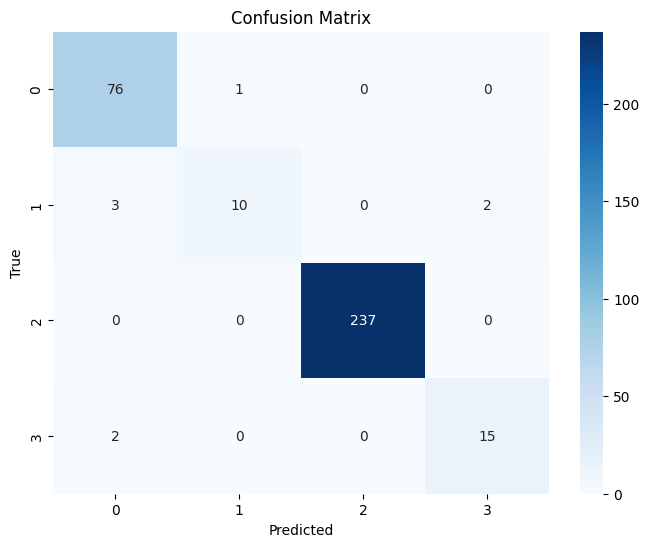

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the dataset
data = pd.read_csv('car-info.csv')

# Check the column names
print("Column names:", data.columns)

# Assign column names
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Preview the dataset after column assignment
print()
print(data.head())

# Convert categorical data to numerical using LabelEncoder
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Store label encoders for future use

# Split the data into features (X) and target (y)
X = data.drop('class', axis=1)  # Replace 'class' with the actual target column name if different
y = data['class']  # Target (the 'class' column)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an MLP model (Multilayer Perceptron)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, activation='relu', solver='adam', random_state=42)

# Train the MLP model
mlp.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
